In [60]:
import pandas as pd
import numpy as np
import helper_functions as hf
import importlib
importlib.reload(hf)



df, dt = hf.init(ure=[1,2],weather=False)
dt.head()

,timestamp,PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE,POGAČARJEV TRG-TRŽNICA,KONGRESNI TRG-ŠUBIČEVA ULICA,CANKARJEVA UL.-NAMA,BREG,GRUDNOVO NABREŽJE-KARLOVŠKA C.,MIKLOŠIČEV PARK,BAVARSKI DVOR,TRG OF-KOLODVORSKA UL.,...,LEK - VEROVŠKOVA,VOKA - SLOVENČEVA,SUPERNOVA LJUBLJANA - RUDNIK,pon,pet,vikend,time_int,pocitnice,timestampminus1,timestampminus2
0,2022-08-04 23:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,1404,True,2022-08-04 22:19:00,2022-08-04 21:29:00
1,2022-08-05 00:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,True,False,24,True,2022-08-04 22:19:00,2022-08-04 22:19:00
2,2022-08-08 04:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,False,298,True,2022-08-08 03:53:00,2022-08-08 02:53:00
3,2022-08-08 05:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,False,358,True,2022-08-08 03:53:00,2022-08-08 03:53:00
4,2022-08-11 21:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,1273,True,2022-08-11 20:08:00,2022-08-11 19:08:00


<AxesSubplot: xlabel='prcp', ylabel='Count'>

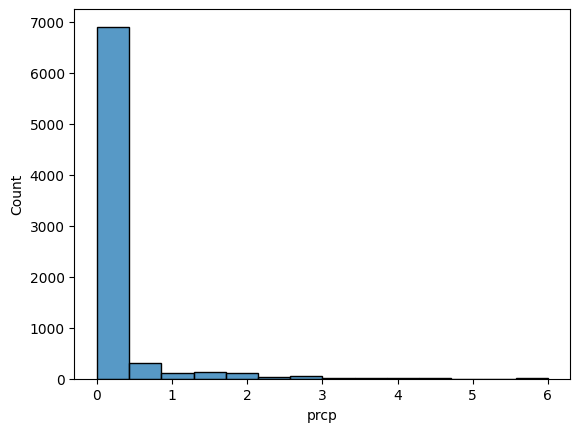

In [61]:
df_w, _ = hf.init(ure=[1,2],weather=True)
import seaborn as sns
sns.histplot(data=df_w, x="prcp")

In [62]:
df.columns[-11:]

Index(['ROŠKA - STRELIŠKA', 'LEK - VEROVŠKOVA', 'VOKA - SLOVENČEVA',
       'SUPERNOVA LJUBLJANA - RUDNIK', 'pon', 'pet', 'vikend', 'time_int',
       'pocitnice', 'timestampminus1', 'timestampminus2'],
      dtype='object')

In [63]:

pp,_,_ = hf.get_pp(df,df, "PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE")
pp

,y,pon,pet,vikend,time_int,pocitnice,y1,y2
0,16,False,False,False,895,True,17,17
1,19,False,False,False,900,True,17,17
2,16,False,False,False,905,True,18,17
3,16,False,False,False,910,True,18,17
4,19,False,False,False,915,True,19,17
...,...,...,...,...,...,...,...,...
7283,18,False,False,True,1083,False,20,19
7284,20,False,False,True,1087,False,20,19
7285,19,False,False,True,1093,False,20,19
7286,19,False,False,True,1096,False,20,18


In [64]:
from sklearn import preprocessing
X = np.array(pp.iloc[:,1:])
X_norm  = preprocessing.normalize(X)
y = np.array(pp.iloc[:,0])

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression()
#model.fit(X_norm, y)
scores = cross_val_score(model, X_norm, y, scoring='neg_root_mean_squared_error', cv=5) # TODO scoring?
# print(scores)
print(np.mean(scores))
#r_sq = model.score(Xt, yt)
#print(f"coefficient of determination: {r_sq}")

-6.513413258813938


In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
model = GradientBoostingRegressor()
#model.fit(X, y)
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5) # TODO scoring?
# print(scores)
print(np.mean(scores))

-3.5707626945466004


In [69]:

from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(random_state=0)
res = hf.run(df,dt,clf,inside=False)
        
        

PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE
POGAČARJEV TRG-TRŽNICA
KONGRESNI TRG-ŠUBIČEVA ULICA
CANKARJEVA UL.-NAMA
BREG
GRUDNOVO NABREŽJE-KARLOVŠKA C.
MIKLOŠIČEV PARK
BAVARSKI DVOR
TRG OF-KOLODVORSKA UL.
MASARYKOVA DDC
VILHARJEVA CESTA
PARK NAVJE-ŽELEZNA CESTA
TRG MDB
PARKIRIŠČE NUK 2-FF
AMBROŽEV TRG
GH ŠENTPETER-NJEGOŠEVA C.
ILIRSKA ULICA
TRŽAŠKA C.-ILIRIJA
TIVOLI
STARA CERKEV
KINO ŠIŠKA
ŠPICA
BARJANSKA C.-CENTER STAREJŠIH TRNOVO
ZALOŠKA C.-GRABLOVIČEVA C.
TRŽNICA MOSTE
ROŽNA DOLINA-ŠKRABČEVA UL.
DUNAJSKA C.-PS PETROL
PLEČNIKOV STADION
DUNAJSKA C.-PS MERCATOR
LIDL - VOJKOVA CESTA
ŠPORTNI CENTER STOŽICE
KOPRSKA ULICA
MERCATOR CENTER ŠIŠKA
CITYPARK
BTC CITY/DVORANA A
BTC CITY ATLANTIS
TRNOVO
P+R BARJE
P + R DOLGI MOST
BONIFACIJA
ANTONOV TRG
BRATOVŠEVA PLOŠČAD
BS4-STOŽICE
SAVSKO NASELJE 2-LINHARTOVA CESTA
SAVSKO NASELJE 1-ŠMARTINSKA CESTA
SITULA
ŠTEPANJSKO NASELJE 1-JAKČEVA ULICA
HOFER-KAJUHOVA
BRODARJEV TRG
PREGLOV TRG
LIDL-LITIJSKA CESTA
ŽIVALSKI VRT
CESTA NA ROŽNIK
ŠMARTINSKI PARK
POLJANSKA-P

In [70]:
# print(res)

In [78]:
res.drop([x for x in ["pon",	"pet",	"vikend",	"time_int",	"pocitnice",	"timestampminus1",	"timestampminus2", "temp","prcp"] if x in res.columns],axis=1).to_csv(index=False,path_or_buf='/home/lema/Documents/UOZP/bicikelj/lala_reg_round_vreme2_nazaj.csv')

In [33]:
def test_ure(ure):
    scores = []
    df, _ = hf.init(ure=ure)
    postaje = [x for x in list(df.columns) if x.isupper()]
    for postaja in postaje:
        pp,_,_ = hf.get_pp(df,df, postaja)
        X = np.array(pp.iloc[:,1:])
        y = np.array(pp.iloc[:,0])
        model = GradientBoostingRegressor()
        score = np.mean(cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5))
        scores.append(score)
    print(scores)
    return(scores)
    
    
    

In [34]:
ure_scores = []
for ure in [[2],[1,2],[1,1.5,2]]:
    
    ure_scores.append(test_ure(ure))



[-4.2538401404905395, -4.337254635217483, -4.2761704279042325, -5.472977092972622, -3.5908472108692395, -2.6446623030463865, -3.633706060740265, -3.8181853186805212, -5.569706601068431, -3.69874769027984, -3.2019940943593737, -3.139631945770858, -3.364793753824222, -3.5001551811793434, -3.5395943461036006, -3.7849442519179535, -3.084077946863311, -3.1898962531730484, -3.873856128937745, -2.6844888566405007, -4.508089585487992, -3.2882505854599144, -3.2154160435156895, -2.2818183337973084, -3.2577702680972322, -3.681390364449295, -2.9871506239443115, -3.1335874457731014, -3.6181544378123704, -3.9668028859016276, -3.7912563596185094, -1.1264916925740647, -2.5713243908020926, -3.1568622328714055, -3.014044411526193, -2.309906307252759, -3.088629849166641, -1.968599518167658, -2.5604534662691867, -2.1384708953749816, -3.040146255096958, -2.796698885171641, -2.0685121947924805, -3.2263239779013126, -2.8343154524579033, -3.4054483201839645, -2.3218957435836547, -2.727950754868349, -2.7474683

In [45]:
np.sum(np.array(ure_scores[0]) > np.array(ure_scores[1])) / len(ure_scores[0]) # frekv da je [2] boljši od [1,2]: 0.0
np.sum(np.array(ure_scores[1]) > np.array(ure_scores[2])) / len(ure_scores[0]) # frekv da je [1,2] boljši od [1,1.5,2]: 0.4819277108433735


0.4819277108433735